In [ ]:
# EJERCICIO 1

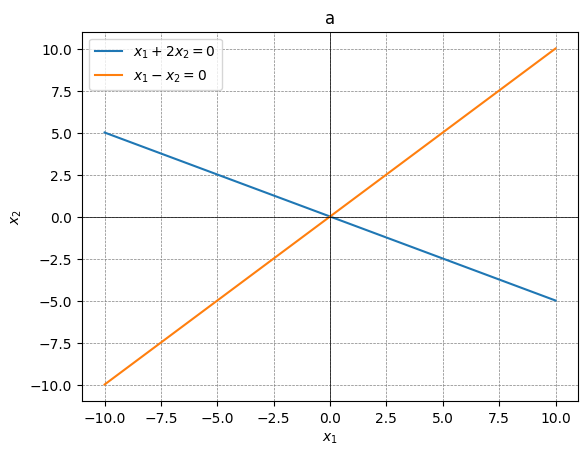

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# a)
def plot_system_a():
    x = np.linspace(-10, 10, 400)
    y1 = -0.5 * x
    y2 = x

    plt.figure()
    plt.plot(x, y1, label='$x_1 + 2x_2 = 0$')
    plt.plot(x, y2, label='$x_1 - x_2 = 0$')
    plt.xlabel('$x_1$')
    plt.ylabel('$x_2$')
    plt.axhline(0, color='black',linewidth=0.5)
    plt.axvline(0, color='black',linewidth=0.5)
    plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
    plt.legend()
    plt.title('a')
    plt.show()

plot_system_a()


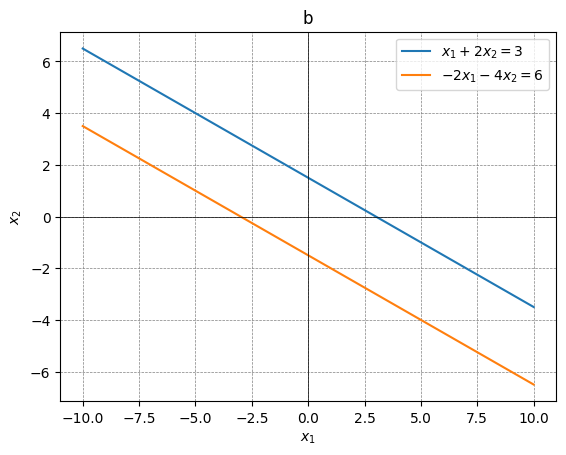

In [5]:
# b)
def plot_system_b():
    x = np.linspace(-10, 10, 400)
    y1 = 1.5 - 0.5 * x
    y2 = -1.5 - 0.5 * x

    plt.figure()
    plt.plot(x, y1, label='$x_1 + 2x_2 = 3$')
    plt.plot(x, y2, label='$-2x_1 - 4x_2 = 6$')
    plt.xlabel('$x_1$')
    plt.ylabel('$x_2$')
    plt.axhline(0, color='black',linewidth=0.5)
    plt.axvline(0, color='black',linewidth=0.5)
    plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
    plt.legend()
    plt.title('b')
    plt.show()

plot_system_b()

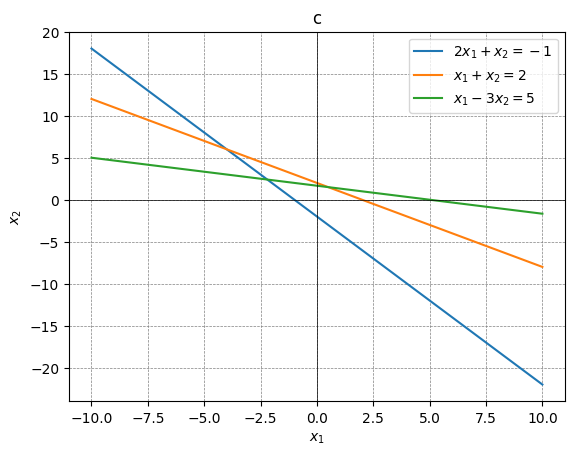

In [6]:
# c)
def plot_system_c():
    x = np.linspace(-10, 10, 400)
    y1 = -2 - 2 * x
    y2 = 2 - x
    y3 = (5 - x) / 3

    plt.figure()
    plt.plot(x, y1, label='$2x_1 + x_2 = -1$')
    plt.plot(x, y2, label='$x_1 + x_2 = 2$')
    plt.plot(x, y3, label='$x_1 - 3x_2 = 5$')
    plt.xlabel('$x_1$')
    plt.ylabel('$x_2$')
    plt.axhline(0, color='black',linewidth=0.5)
    plt.axvline(0, color='black',linewidth=0.5)
    plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
    plt.legend()
    plt.title('c')
    plt.show()

plot_system_c()

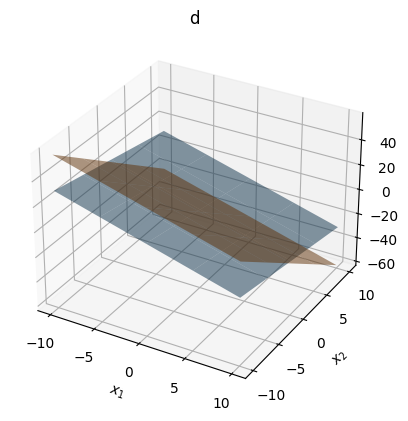

In [7]:
# d)
def plot_system_d():
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Define planos
    x = np.linspace(-10, 10, 400)
    y = np.linspace(-10, 10, 400)
    X, Y = np.meshgrid(x, y)

    Z1 = 1 - 2*X - Y
    Z2 = -1 - 2*X - 4*Y

    ax.plot_surface(X, Y, Z1, alpha=0.5, rstride=100, cstride=100)
    ax.plot_surface(X, Y, Z2, alpha=0.5, rstride=100, cstride=100)

    ax.set_xlabel('$x_1$')
    ax.set_ylabel('$x_2$')
    ax.set_zlabel('$x_3$')

    plt.title('d')
    plt.show()

plot_system_d()

In [ ]:
# EJERCICIO 2

In [14]:
import numpy as np


def gauss_elimination_with_rounding(A, b):
    n = len(A)
    M = A

    for i in range(n):
        M[i] = [round(elem, 2) for elem in M[i]]
        b[i] = round(b[i], 2)

    for k in range(n):
        for i in range(k+1, n):
            if M[i][k] != 0.0:
                lam = round(M[i][k] / M[k][k], 2)
                M[i] = [round(M[i][j] - lam * M[k][j], 2) for j in range(n)]
                b[i] = round(b[i] - lam * b[k], 2)

    x = [0 for i in range(n)]
    for i in range(n-1, -1, -1):
        s = sum(M[i][j] * x[j] for j in range(i, n))
        x[i] = round((b[i] - s) / M[i][i], 2)
    return x


In [15]:
# a)
A1 = np.array([
    [-1, 4, 1],
    [5/3, 2/3, 2/3],
    [2, 1, 4]
])
b1 = np.array([8, 1, 11])
x1 = gauss_elimination_with_rounding(A1, b1)
print("Solucion literal a):", x1)

Solucion literal a): [-1.18, 0.99, 2.86]


In [16]:
# b)
A2 = np.array([
    [4, 2, -1],
    [1/9, 1/2, -1/3],
    [1, 4, 2]
])
b2 = np.array([-5, -1, 9])
x2 = gauss_elimination_with_rounding(A2, b2)
print("Solucion literal b):", x2)

Solucion literal b): [-1.44, 1.47, 2.16]


In [ ]:
# EJERCICIO 3

In [17]:
import numpy as np
import logging

logging.basicConfig(level=logging.INFO)

def eliminacion_gaussiana(A: np.ndarray) -> np.ndarray:
    if not isinstance(A, np.ndarray):
        logging.debug("Convirtiendo A a numpy array.")
        A = np.array(A, dtype=float)  # convertir en float, porque si no, convierte en enteros
    assert A.shape[0] == A.shape[1] - 1, "La matriz B debe ser de tamaño n-by-(n+1)."
    n = A.shape[0]
    n_adds = 0
    n_mults = 0
    intercambios = []
    for i in range(0, n - 1):  # loop por columna

        # --- encontrar pivote
        p = None  # default, first element
        for pi in range(i, n):
            if A[pi, i] == 0:
                # must be nonzero
                continue

            if p is None:
                # first nonzero element
                p = pi
                continue

            if abs(A[pi, i]) > abs(A[p, i]):
                p = pi

        if p is None:
            # no pivot found.
            logging.info(f"\n{A}")
            raise ValueError("No existe solución única.")

        if p != i:
            logging.info(f"Intercambiando filas {i} y {p}.")
            # swap rows
            A[[i, p]] = A[[p, i]]
            intercambios.append((i, p))

        # --- Eliminación: loop por fila
        for j in range(i + 1, n):
            m = A[j, i] / A[i, i]
            A[j, i:] -= m * A[i, i:]
            n_mults += 1 + (n + 1 - i - 1)
            n_adds += n + 1 - i - 1

        logging.info(f"\n{A}")

    if A[n - 1, n - 1] == 0:
        if A[n - 1, n] == 0:
            raise ValueError("Infinitas soluciones.")
        else:
            raise ValueError("Sin solucion",print("Sin solución."))

    # --- Sustitución hacia atrás
    solucion = np.zeros(n)
    solucion[n - 1] = A[n - 1, n] / A[n - 1, n - 1]
    n_mults += 1

    for i in range(n - 2, -1, -1):
        suma = 0
        n_adds -= 1
        for j in range(i + 1, n):
            suma += A[i, j] * solucion[j]
            n_mults += 1
            n_adds += 1
        solucion[i] = (A[i, n] - suma) / A[i, i]
        n_adds += 1
        n_mults += 1

    return solucion, n_adds, n_mults, intercambios

In [18]:
if __name__ == "__main__":
    A = np.array([
        [1, -1, 3, 2],
        [3, -3, 1, -1],
        [1, 1, 0, 3]
    ], dtype=float)

    print("Literal a:")
    print("Matriz original:")
    print(A)
    print("\nSolución por eliminación gaussiana:")
    solucion, n_adds, n_mults, intercambios = eliminacion_gaussiana(A.copy())
    print("Solución:", solucion)
    print("Sumas:", n_adds)
    print("Multiplicaciones:", n_mults)
    print("Intercambios de filas:", intercambios)

Literal a:
Matriz original:
[[ 1. -1.  3.  2.]
 [ 3. -3.  1. -1.]
 [ 1.  1.  0.  3.]]

Solución por eliminación gaussiana:
Solución: [1.1875 1.8125 0.875 ]
Sumas: 11
Multiplicaciones: 17
Intercambios de filas: [(0, 1), (1, 2)]


In [19]:
if __name__ == "__main__":
    A = np.array([
        [2,-1.5,3,1],
        [-1,0,2,3],
        [4,-4.5,5,1]
        ], dtype=float)

    print("Literal b:")
    print("Matriz original:")
    print(A)
    print("\nSolución por eliminación gaussiana:")
    solucion, n_adds, n_mults, intercambios = eliminacion_gaussiana(A.copy())
    print("Solución:", solucion)
    print("Sumas:", n_adds)
    print("Multiplicaciones:", n_mults)
    print("Intercambios de filas:", intercambios)


Literal b:
Matriz original:
[[ 2.  -1.5  3.   1. ]
 [-1.   0.   2.   3. ]
 [ 4.  -4.5  5.   1. ]]

Solución por eliminación gaussiana:
Solución: [-1. -0.  1.]
Sumas: 11
Multiplicaciones: 17
Intercambios de filas: [(0, 2)]


In [20]:
if __name__ == "__main__":
    A = np.array([
        [2,0,0,0,3],
        [1,1.5,0,0,4.5],
        [0,-3,0.5,0,-6.6],
        [2,-2,1,1,0.8]
        ], dtype=float)

    print("Literal c:")
    print("Matriz original:")
    print(A)
    print("\nSolución por eliminación gaussiana:")
    solucion, n_adds, n_mults, intercambios = eliminacion_gaussiana(A.copy())
    print("Solución:", solucion)
    print("Sumas:", n_adds)
    print("Multiplicaciones:", n_mults)
    print("Intercambios de filas:", intercambios)

Literal c:
Matriz original:
[[ 2.   0.   0.   0.   3. ]
 [ 1.   1.5  0.   0.   4.5]
 [ 0.  -3.   0.5  0.  -6.6]
 [ 2.  -2.   1.   1.   0.8]]

Solución por eliminación gaussiana:
Solución: [ 1.5  2.  -1.2  3. ]
Sumas: 26
Multiplicaciones: 36
Intercambios de filas: [(1, 2), (2, 3)]


In [21]:
if __name__ == "__main__":
    A = np.array([
        [1,1,0,1,2],
        [2,1,-1,1,1],
        [4,-1,-2,2,0],
        [3,-1,-1,2,-3]
        ], dtype=float)

    print("Literal d:")
    print("Matriz original:")
    print(A)
    print("\nSolución por eliminación gaussiana:")
    solucion, n_adds, n_mults, intercambios = eliminacion_gaussiana(A.copy())
    print("Solución:", solucion)
    print("Sumas:", n_adds)
    print("Multiplicaciones:", n_mults)
    print("Intercambios de filas:", intercambios)

Literal d:
Matriz original:
[[ 1.  1.  0.  1.  2.]
 [ 2.  1. -1.  1.  1.]
 [ 4. -1. -2.  2.  0.]
 [ 3. -1. -1.  2. -3.]]

Solución por eliminación gaussiana:
Sin solución.


ValueError: ('Sin solucion', None)

In [ ]:
# EJERCICIO 4

In [23]:
import numpy as np

def gaussian_elimination(A, b):
    # Convert to 32-bit precision
    A = A.astype(np.float32)
    b = b.astype(np.float32)

    n = len(b)

    # Forward elimination
    for i in range(n):
        # Pivoting
        max_row = np.argmax(np.abs(A[i:, i])) + i
        if A[max_row, i] == 0:
            raise ValueError("Matrix is singular.")

        # Swap rows
        A[[i, max_row]] = A[[max_row, i]]
        b[[i, max_row]] = b[[max_row, i]]

        # Eliminate below
        for j in range(i + 1, n):
            factor = A[j, i] / A[i, i]
            A[j, i:] -= factor * A[i, i:]
            b[j] -= factor * b[i]

    # Back substitution
    x = np.zeros(n, dtype=np.float32)
    for i in range(n - 1, -1, -1):
        x[i] = (b[i] - np.dot(A[i, i + 1:], x[i + 1:])) / A[i, i]

    return x

In [24]:
A = np.array([[1/4, 1/5, 1/6],
              [1/3, 1/4, 1/5],
              [1/2, 1, 2]], dtype=np.float32)
b = np.array([9, 8, 8], dtype=np.float32)

sol = gaussian_elimination(A, b)
print("Solución:", sol)

Solución: [-227.07697  476.92322 -177.69237]


In [25]:
A = np.array([[3.33, 15920, -10.333],
              [2.222, 16.71, 9.612],
              [1.5611, 5.1791, 1.6852]], dtype=np.float32)
b = np.array([15913, 28.544, 8.4254], dtype=np.float32)

sol = gaussian_elimination(A, b)
print("Solución:", sol)

Solución: [0.9997302 1.0000002 1.0000108]


In [26]:
A = np.array([[1, 1/2, 1/3, 1/4],
              [1/2, 1/3, 1/4, 1/5],
              [1/3, 1/4, 1/5, 1/6],
              [1/4, 1/5, 1/6, 1/7]], dtype=np.float32)
b = np.array([1/6, 1/7, 1/8, 1/9], dtype=np.float32)

sol = gaussian_elimination(A, b)
print("Solución:", sol)

Solución: [-0.03174745  0.59525675 -2.3809996   2.7778091 ]


In [27]:
A = np.array([[2, 1, -1, 1, -3],
              [1, 0, 2, -1, 1],
              [0, -2, -1, 1, -1],
              [3, 1, -4, 0, 5],
              [1, -1, -1, -1, 1],], dtype=np.float32)
b = np.array([7, 2, -5, 6, -3], dtype=np.float32)

sol = gaussian_elimination(A, b)
print("Solución:", sol)


Solución: [1.8830409  2.8070176  0.730994   1.4385961  0.09356716]


In [ ]:
# EJERCICIO 5

In [28]:
def analyze_system_with_alpha():
    from sympy import symbols, Eq, solve

    alpha = symbols('alpha')
    x1, x2, x3 = symbols('x1 x2 x3')

    equations = [
        Eq(x1 - x2 + alpha * x3, -2),
        Eq(-x1 + 2 * x2 - alpha * x3, 3),
        Eq(alpha * x1 + x2 + x3, 2)
    ]

    sol = solve(equations, (x1, x2, x3, alpha), dict=True)
    alpha_values = [s[alpha] for s in sol]

    for val in alpha_values:
        if val != alpha:
            print(f"Para α = {val}, el sistema tiene solución.")
        else:
            print("Para valores de α distintos a los encontrados, el sistema no tiene solución.")

analyze_system_with_alpha()


Para α = -1, el sistema tiene solución.
Para α = (x3 - 1)/x3, el sistema tiene solución.


In [ ]:
# EJERCICIO 6

In [29]:
def system_of_species():
    A = np.array([
        [1, 2, 0, 3],
        [1, 0, 2, 2],
        [0, 0, 1, 1]
    ])
    x = np.array([1000, 500, 350, 400])
    b = np.array([3500, 2700, 900])

    # Verificar si hay suficiente alimento
    suficiente_alimento = np.all(np.dot(A, x) <= b)
    print(f"¿Hay suficiente alimento? {'Sí' if suficiente_alimento else 'No'}")

    # Número máximo de animales que se podría agregar
    incrementos_maximos = b - np.dot(A, x)
    print(f"Incrementos máximos posibles: {incrementos_maximos}")

    # Incrementos si la especie 1 se extingue
    A_ext1 = A[:, 1:]
    incrementos_ext1 = b - np.dot(A_ext1, x[1:])
    print(f"Incrementos posibles si la especie 1 se extingue: {incrementos_ext1}")

    # Incrementos si la especie 2 se extingue
    A_ext2 = np.delete(A, 1, axis=1)
    incrementos_ext2 = b - np.dot(A_ext2, np.delete(x, 1))
    print(f"Incrementos posibles si la especie 2 se extingue: {incrementos_ext2}")

system_of_species()

¿Hay suficiente alimento? Sí
Incrementos máximos posibles: [300 200 150]
Incrementos posibles si la especie 1 se extingue: [1300 1200  150]
Incrementos posibles si la especie 2 se extingue: [1300  200  150]


In [ ]:
#EJERCICIO 7

In [30]:
def gauss_jordan(A, b):
    n = len(b)
    A = A.astype(float)
    b = b.astype(float).reshape(-1, 1)
    augmented_matrix = np.hstack((A, b))

    for i in range(n):
        augmented_matrix[i] = augmented_matrix[i] / augmented_matrix[i, i]
        for j in range(n):
            if i != j:
                augmented_matrix[j] -= augmented_matrix[i] * augmented_matrix[j, i]

    return augmented_matrix[:, -1]

# Resolver cada sistema con Gauss-Jordan
solutions_gj = [gauss_jordan(A, b) for A, b in systems]
for i, sol in enumerate(solutions_gj):
    print(f'Sistema {i+1} (Gauss-Jordan): {sol}')


Sistema 1 (Gauss-Jordan): [-227.07669834  476.92267099 -177.69216091]
Sistema 2 (Gauss-Jordan): [0.99999962 1.         1.00000021]
Sistema 3 (Gauss-Jordan): [-0.03174521  0.59523101 -2.38093701  2.77776827]
Sistema 4 (Gauss-Jordan): [1.96396396 2.59459459 0.8018018  1.71171171 0.14414414]
